In [4]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
import sklearn.datasets 

dsBoston = sklearn.datasets.load_boston()
dfBoston

NameError: name 'dfBoston' is not defined

In [6]:
dsBoston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
dfBoston = pd.DataFrame(dsBoston.data, columns = dsBoston.feature_names )
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
dfBoston.shape

(506, 13)

In [9]:
dsBoston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
dfBoston['MEDV'] = dsBoston.target
dfBoston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


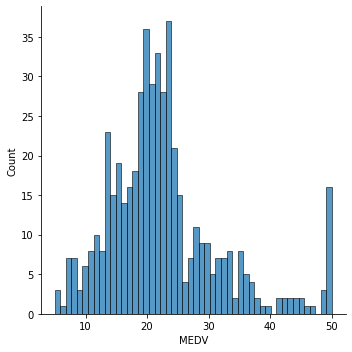

In [13]:
sns.displot(dfBoston['MEDV'], bins=50)
plt.show()


In [14]:
correlation_matrix_boston=dfBoston.corr().round(2)
correlation_matrix_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


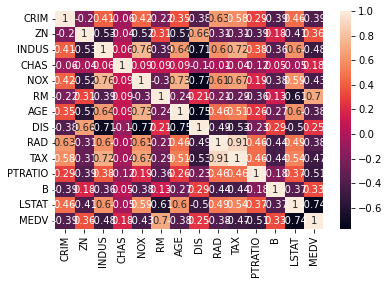

In [15]:

sns.heatmap(data=correlation_matrix_boston, annot=True )
plt.show()

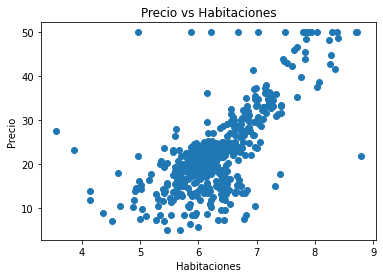

In [17]:
plt.scatter(dfBoston['RM'], dfBoston['MEDV'])
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.title('Precio vs Habitaciones')
plt.show()

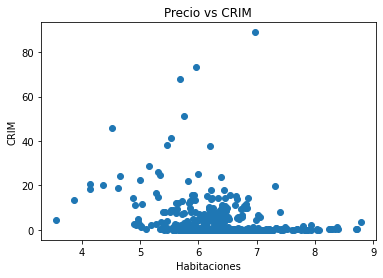

In [18]:
plt.scatter(dfBoston['RM'], dfBoston['CRIM'])
plt.xlabel('Habitaciones')
plt.ylabel('CRIM')
plt.title('Precio vs CRIM')
plt.show()

In [23]:


x_featureRM = dfBoston['RM']
y_priceMEDV = dfBoston['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x_featureRM, y_priceMEDV, test_size = 0.2, random_state= 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404,)
(102,)
(404,)
(102,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [32]:
x_train = x_train.values.reshape(-1,1)

lin_model_boston = LinearRegression()
lin_model_boston.fit(x_train, y_train)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [33]:

print('Coeficiente: \n', lin_model_boston.coef_)
print('Termino independiente: \n', lin_model_boston.intercept_)

Coeficiente: 
 [9.34830141]
Termino independiente: 
 -36.24631889813795


In [35]:
from sklearn.metrics import r2_score

In [36]:
y_train_predict = lin_model_boston.predict(x_train)
r2 = r2_score(y_train, y_train_predict)
print('R2 es: {}'.format(r2))

R2 es: 0.5050658352776293


In [38]:
x_test = x_test.values.reshape(-1,1)

y_test_predict = lin_model_boston.predict(x_test)
r2 = r2_score(y_test, y_test_predict)
print('R2 es: {}'.format(r2))

R2 es: 0.3707569232254778


In [39]:
predicted_data_boston = lin_model_boston.predict(dfBoston[['RM']])
predicted_data_boston[0:5]

array([25.21876285, 23.77912443, 30.92122671, 29.17309434, 30.56599125])

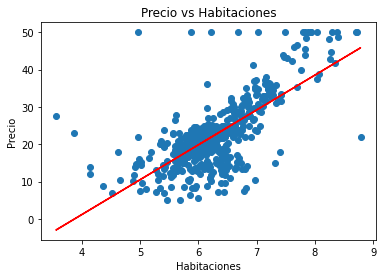

In [46]:
plt.scatter(dfBoston['RM'], dfBoston['MEDV'])

plt.plot(dfBoston['RM'], predicted_data_boston, color='red')

plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.title('Precio vs Habitaciones')
plt.show()

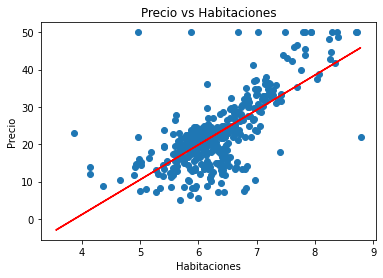

In [47]:
plt.scatter(x_train, y_train)

plt.plot(dfBoston['RM'], predicted_data_boston, color='red')

plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.title('Precio vs Habitaciones')
plt.show()

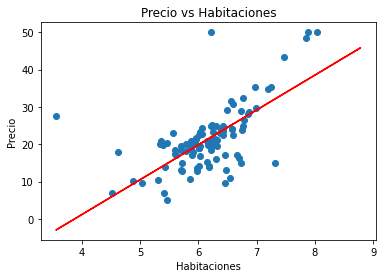

In [48]:
plt.scatter(x_test, y_test)

plt.plot(dfBoston['RM'], predicted_data_boston, color='red')

plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.title('Precio vs Habitaciones')
plt.show()

In [49]:
dfAP = pd.DataFrame({'Actual':dfBoston['MEDV'], 'Prediccion' : predicted_data_boston})
dfAP.head(10)

,Actual,Prediccion
0,24.0,25.218763
1,21.6,23.779124
2,34.7,30.921227
3,33.4,29.173094
4,36.2,30.565991
5,28.7,23.863259
6,22.9,19.955669
7,27.1,21.451397
8,16.5,16.393966
9,18.9,19.880883


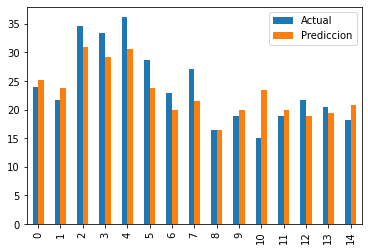

In [50]:
dfAP.head(15).plot(kind='bar')
plt.show()